# About the Dataset

**Website**: daft.ie
According to daft.ie, it is considered to be Ireland's No. 1 Property website, founded in 1997 by Eamonn and Brian Fallon.
daft.ie enables users to create listings/ads for properties. Daft.ie provides 4 main sections: 
    - Buy: ads/listings about properties to buy
    - Rent: ads/ listings about properties to rent
    - Share: ads/ listings about rooms to rent
    - New Homes: ads/ listings about new properties to buy
    
**Date and time of scraping:** 13.04.2024 1:00 am
    
The webscraped dataset only focuses on "Share" listings contains the following informations: 

    - "Address": address of the room
    - "Room": specifies whether the room has single, double or is twin or shared room. A listing can advertise multiple rooms in a house or apartment.
    
                values:
                       'Single Room', 'Double Room', 'Twin Room',
                       'Single, Double & Twin Room', 'Shared Room',
                       'Single & Double Room', 'Double & Twin Room', 'Single & Twin Room',
                       'Twin & Shared Room', 'Single & Shared Room',
                       'Single, Double & Shared Room', 'Double & Shared Room',
                       'Double, Twin & Shared Room'
    - "Bath": specifies whether the room has an en-suite bathroom or the bathroom is shared between housemates.
    - "Property_type" : specifies whether the property is a house or an apartment
    - "Bedrooms_available": specifies how many bedrooms are available on the property
    - "Available_from": specifies when the room is available to move in to.
    - "Available_for": specifies how long the room is available for.
    - "Sharing_with": specifies how many people currently live on the property.
    - "Owner_occupied": specifies whether the owner lives on the property or not.
    - "Preferences": specifies which gender is preferred for room.
    - "Date_entered/renewed": displays the date when the listing was first entered/ renewed.
    - "Property_views": displays how many times the listing has been viewed.
               
                     

In [60]:
df["Preferences"].unique()

array(['Male / Female', 'Female', 'Male', 'Male / Female / +1 Person',
       'Female / +1 Person', 'Male / +1 Person'], dtype=object)

# WordCloud

In [197]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
df = pd.read_csv("final_daft_listings.csv")

In [4]:
df.head()

,Address,Room,Bath,Property_type,Bedrooms_available,Available_from,Available_for,Sharing_with,Owner_occupied,Preferences,Date_entered/renewed,Property_views,Latitude,Longitude,Pre_processed_desc,Desc_length,Price_per_month,County,adjective_counts
0,"Ballycasey Close, Shannon, Co. Clare",Single Room,Shared Bathroom,House,1,Immediately,6 Months,2,Yes,Male / Female,21/03/2023,899,NaN,NaN,hoste power agency provide affordable accommod...,551,640.0,Clare,8
1,"63 Fernleigh Drive , Carpenterstown, Dublin 15",Double Room,Shared Bathroom,House,1,Immediately,1 Year,2,No,Female,10/04/2023,"1,308",NaN,NaN,two double room available carpenterstown local...,784,800.0,Dublin 15,10
2,"Beaufield Gardens, Maynooth, Co. Kildare",Double Room,Shared Bathroom,House,1,Immediately,1 Year +,4,No,Male / Female,13/04/2023,280,53.373441,-6.598454,just available room center maynooth centrally ...,364,520.0,Kildare,5
3,"87 Old Willow Park, Athlone, Athlone, Co. West...",Single Room,Shared Bathroom,House,3,"May 1st, 2023",3 Months,2,No,Female,13/04/2023,168,NaN,NaN,this fabulous newly refurbished property old w...,405,400.0,Westmeath,5
4,"62 Lanesborough Mews, Dublin 11, Dublin 11",Double Room,Shared Bathroom,Apartment,1,Immediately,6 Months,2,No,Male / Female,12/04/2023,"1,110",53.402606,-6.294961,this spaciouse double room 3 bed room apartmen...,438,950.0,Dublin 11,9


# Sentiment score

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
SIA = SentimentIntensityAnalyzer()

In [19]:
# function that extracts the compound score
def extract_compound(text): 
    score = SIA.polarity_scores(text)
    compound = score["compound"]
    return compound

In [20]:
df["Sentiment_score"] = df["Pre_processed_desc"].apply(lambda x: extract_compound(x))

In [21]:
df.head()

,Address,Room,Bath,Property_type,Bedrooms_available,Available_from,Available_for,Sharing_with,Owner_occupied,Preferences,Date_entered/renewed,Property_views,Latitude,Longitude,Pre_processed_desc,Desc_length,Price_per_month,County,adjective_counts,Sentiment_score
0,"Ballycasey Close, Shannon, Co. Clare",Single Room,Shared Bathroom,House,1,Immediately,6 Months,2,Yes,Male / Female,21/03/2023,899,NaN,NaN,hoste power agency provide affordable accommod...,551,640.0,Clare,8,0.9380
1,"63 Fernleigh Drive , Carpenterstown, Dublin 15",Double Room,Shared Bathroom,House,1,Immediately,1 Year,2,No,Female,10/04/2023,"1,308",NaN,NaN,two double room available carpenterstown local...,784,800.0,Dublin 15,10,0.7650
2,"Beaufield Gardens, Maynooth, Co. Kildare",Double Room,Shared Bathroom,House,1,Immediately,1 Year +,4,No,Male / Female,13/04/2023,280,53.373441,-6.598454,just available room center maynooth centrally ...,364,520.0,Kildare,5,0.5859
3,"87 Old Willow Park, Athlone, Athlone, Co. West...",Single Room,Shared Bathroom,House,3,"May 1st, 2023",3 Months,2,No,Female,13/04/2023,168,NaN,NaN,this fabulous newly refurbished property old w...,405,400.0,Westmeath,5,0.5267
4,"62 Lanesborough Mews, Dublin 11, Dublin 11",Double Room,Shared Bathroom,Apartment,1,Immediately,6 Months,2,No,Male / Female,12/04/2023,"1,110",53.402606,-6.294961,this spaciouse double room 3 bed room apartmen...,438,950.0,Dublin 11,9,0.9578


the compound (sentiment score) is the normalized, weighted composite score
- positive sentiment : sentiment score >= 0.05
- neutral sentiment : (sentiment score > -0.05) & (sentiment score < 0.05)
- negative sentiment : sentiment score <= -0.05

Thus for easier understanding, a column representing its sentiment verdict will be created.

In [22]:
def sentiment_threshold(sentiment_score): 
    if sentiment_score >= 0.05: 
        sentiment = "positive"
    elif (sentiment_score > -0.05) & (sentiment_score < 0.05): 
        sentiment = "neutral"
    else: 
        sentiment = "negative"
    return sentiment

df["Sentiment"] = df["Sentiment_score"].apply(lambda x: sentiment_threshold(x)) 

In [33]:
# How many positive, neutral and negative descriptions
df["Sentiment"].value_counts()

positive    1504
neutral      158
negative      67
Name: Sentiment, dtype: int64

Unsurprisingly, most daft listings are positive. Since these listings are ads to rent out rooms, the listings need to appear positive. Some are negative, which interesting to see, as negative descriptions would make readers shy away which is not the purpose of posting an ad.

## Are there differences in the distribution of sentiment descriptions between property types ? 

In [54]:
negative_desc = df[df["Sentiment"] == "negative"] # all rows with negative sentiment
positive_desc = df[df["Sentiment"] == "positive"] # all rows with positive sentiment
neutral_desc = df[df["Sentiment"] == "neutral"] # all rows with neutral sentiment

In [55]:
# how many counts for each property type
df["Property_type"].value_counts()

House        1403
Apartment     326
Name: Property_type, dtype: int64

##### number of listings about a room in a house with ...

In [87]:
# positive sentiment & house
print("positive sentiment: " + str(positive_desc["Property_type"].value_counts()[0]))

# neutral sentiment & house
print("neutral sentiment: " + str(neutral_desc["Property_type"].value_counts()[0]))

# negative sentiment & house
print("negative sentiment: " + str(negative_desc["Property_type"].value_counts()[0]))

positive sentiment: 1217
neutral sentiment: 130
negative sentiment: 56


Out of 1403 listings, 1217 listings have a positive description, 130 are neutral and 56 listings have a negative description.

##### number of listings about a room in an apartment with ...

In [86]:
# positive sentiment & apartment
print("positive sentiment: " + str(positive_desc["Property_type"].value_counts()[1]))

# neutral sentiment & apartment
print("neutral sentiment: " + str(neutral_desc["Property_type"].value_counts()[1]))
      
# negative sentiment & apartment
print("negative sentiment: " + str(negative_desc["Property_type"].value_counts()[1]))   

positive sentiment: 287
neutral sentiment: 28
negative sentiment: 11


Out of 326 listings, 287 listings have a positive description, 28 are neutral and 11 descriptions have a negative description.

##### Sentiment proportions by listing in houses vs apartments

Text(0.5, 1.05, 'apartments')

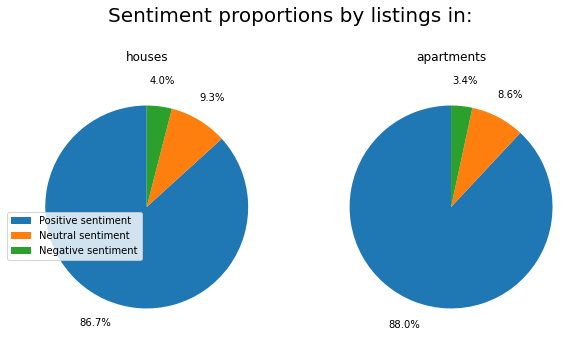

In [194]:
house_sentiment = np.array([positive_desc["Property_type"].value_counts()[0], neutral_desc["Property_type"].value_counts()[0],negative_desc["Property_type"].value_counts()[0]])
sentiment_labels = ["Positive sentiment", "Neutral sentiment", "Negative sentiment"]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
plt.suptitle("Sentiment proportions by listings in:",y=0.78, size = 20)


ax1.pie(house_sentiment, startangle = 90, autopct='%1.1f%%',pctdistance=1.25, labeldistance=1.50)
ax1.legend( labels =sentiment_labels,loc='upper right', bbox_to_anchor=(0.5, 0.5), ncol = 1)
ax1.set_title('houses',y = 1.05)


house_sentiment = np.array([positive_desc["Property_type"].value_counts()[1], neutral_desc["Property_type"].value_counts()[1],negative_desc["Property_type"].value_counts()[1]])

ax2.pie(house_sentiment, startangle = 90, autopct='%1.1f%%',pctdistance=1.25, labeldistance=1.50)
#ax2.legend(labels =sentiment_labels,loc='upper right', bbox_to_anchor=(0.5, 0.5))
ax2.set_title('apartments',y = 1.05)


__Comparison of sentiment proportions by rooms in house and in apartments:__

The distribution within room listings in houses shows that positive descriptions make up to 86.7 % of all house listings. 9.3% are neutral and 4% are negative descriptions.
The distribution within room listings in aparment shows a similar picture. 88 % of the descriptions are positive, 8.6% are neutral and 3.4% are negative.
There are not significant differences in the distribution of positive, neutral and negative descriptions.

# Correlation heat map

in order to check the correlation between different variables, categorical variables will be converted into numerical variables by mapping numbers to each category.

##### function that automatically creates mapping dictionaries 

In [203]:
def dict_mapping(df, column): 
    list_of_unique_values = list(df[column].unique())
    my_dict = dict.fromkeys(list_of_unique_values)
    count = 0
    
    for i in list_of_unique_values:
        my_dict.update({i:count})
        count = count + 1
        
    return my_dict

In [207]:
# categorical variables -> numerical variables
df["Room_map"] = df["Room"].map(dict_mapping(df,"Room"))
df["Bath_map"] = df["Bath"].map(dict_mapping(df,"Bath"))
df["Property_type_map"] = df["Property_type"].map(dict_mapping(df,"Property_type"))
df["Owner_occupied_map"] = df["Owner_occupied"].map(dict_mapping(df,"Owner_occupied"))
df["Preferences_map"] = df["Preferences"].map(dict_mapping(df,"Preferences"))
df["County_map"] = df["County"].map(dict_mapping(df,"County"))

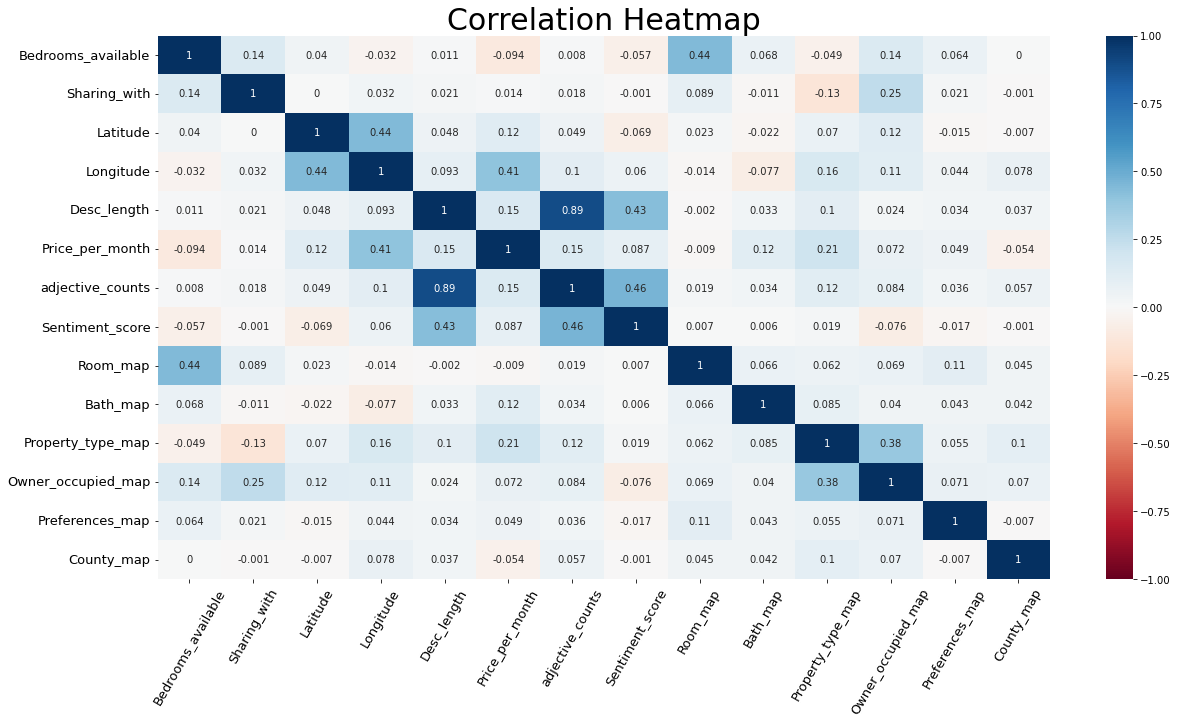

In [208]:
plt.figure(figsize=(20, 10))
corr_map = df.corr().round(3)
seaborn.heatmap(corr_map,vmin=-1, vmax=1, annot=True,cmap='RdBu')
plt.title("Correlation Heatmap", size = 30)
plt.xticks(rotation=60, size = 13)
plt.yticks(size = 13)
plt.show()

__Interesting points:__

*Relationships with medium effect*: 
    
    - rent price and rooms located along the latitude( 0.41) 
    - Room type and how many bedrooms are available (0.44)
    - sentiment of the description and the numbers of words used (0.43)
    - sentiment of the description and the number of adjectives used (0.46)
    
*Relationships with strong effect*: 
    
    - number of adjective used and the number of words used in the description have a very strong relationship with 0.89
    
(Based on this heatmap, one can only determine if certain variables are correlated to each other. But it cannot be determined which variable affects the other.
    
    